# Lab Session 8: Matplotlib

* **Statistics 159/259, Spring 2022**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* 04/11/2022

This is a continuation of previous lecture about [Matplotlib: Beyond the basics](https://ucb-stat-159-s22.github.io/site/lectures/matplotlib_beyond_basics.html). We will explore more matplotlib functionalities and practice how to manage plot objects. Specifically, today we will be practicing:
- Basic manipulation of figures and axes 
- Interactive plots with widgets 
- Analysis of images 
- 3D plots

Useful links: 

- [Matplotlib: Beyond the basics](https://ucb-stat-159-s22.github.io/site/lectures/matplotlib_beyond_basics.html), which also includes more resources. 
- [JupyterHub](https://stat159.datahub.berkeley.edu/hub/login?next=%2Fhub%2F)
- [Convenient credentials management](https://ucb-stat-159-s22.github.io/site/lectures/intro-git/Git-Tutorial.html#convenient-credentials-management)


## Part 1: Matplotlib basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The basic syntax consists in defining the figure and axes for every matplotlib figure we want to create. We can create a simple matplotlib figure by just attaching the `plot()` command to `plt`
```python
    plt.plot(...)
```
This is actually a way to tell matplotlib that we want to plot in the current axes (which we can access via `plt.gca()`), even when this last one has been created explicitly or implicitly. The explicit syntax for doing this will be then
```python
    fig, axes = plt.subplots()
    axes.plot(...)
```
This also makes the difference between the Figure and the Axes:
- Figure: The figure itself
- Axes: The actual area where the data will be rendered. It is also called subplot. 

Text(0, 0.5, 'y')

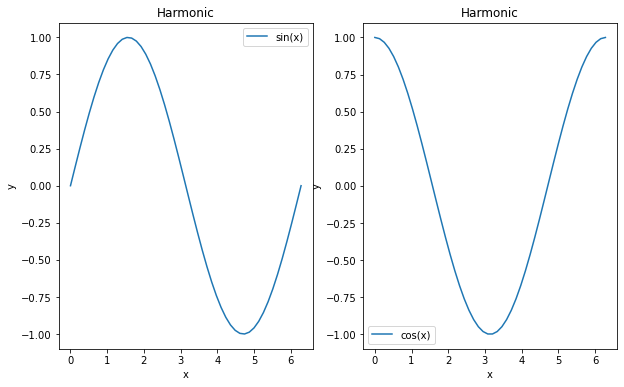

In [9]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
z = np.cos(x)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax[0].plot(x,y, label='sin(x)')  # it's the axis who plots
ax[0].legend()
ax[0].set_title('Harmonic')  # we set the title on the axis
ax[0].set_xlabel('x')  # same with labels
ax[0].set_ylabel('y')

ax[1].plot(x,z, label='cos(x)')  # it's the axis who plots
ax[1].legend()
ax[1].set_title('Harmonic')  # we set the title on the axis
ax[1].set_xlabel('x')  # same with labels
ax[1].set_ylabel('y')

### Learn how to customize your plots

The `setp()` function is very handy at the moment of exploring features for your plot. When you have a matplotlib object, you can use `setp()` to quickly explore all the possible arguments you can change (which you can later include in the definition of such object) or set that property later using `setp()` too. You can do this exploration from the same notebook where you are working or (even better) open a console by pressing right-click on the notebook's name and enter `New Console for Notebook`.

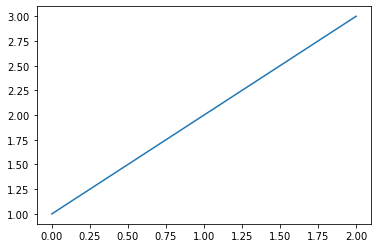

In [10]:
plt.plot([1,2,3])

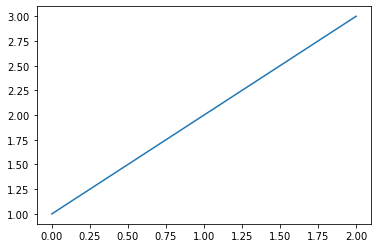

In [11]:
line, = plt.plot([1,2,3])
line

In [12]:
plt.setp(line)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor 

In [13]:
plt.setp(line, 'linestyle')

  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}


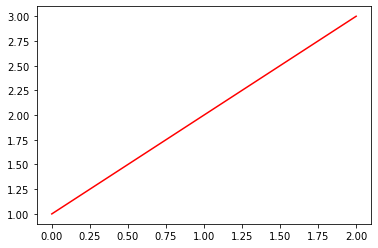

In [14]:
line, = plt.plot([1,2,3])
plt.setp(line, color='r');

You can do the same by 

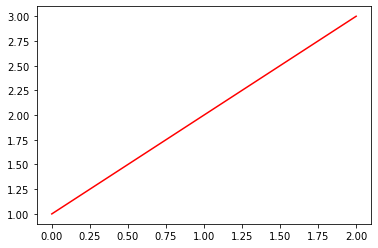

In [15]:
line, = plt.plot([1,2,3])
line.set_color('r')

### Working with multiple axes

If we don't specify it otherwise, the subplot will fill the full figure:

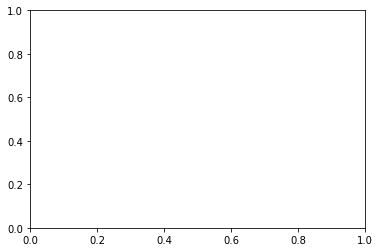

In [16]:
f, ax = plt.subplots()

However, we can have multiple axes/subplots in the same figure:

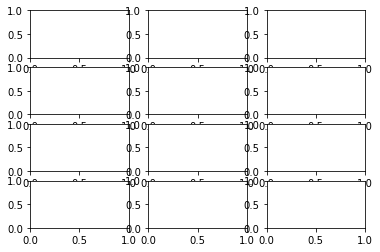

In [17]:
f, ax = plt.subplots(ncols=3, nrows=4)

Each individual axes can be accessed as an element of a numpy array:

In [20]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

### Building on top of Matplotlib: Seaborn and Xarray

Many of other libraries that provide plotting capabilities use matplotlib at a basic level. This means that we can still manipulate figures in Seaborn and Xarray as if we were working in Matplotlib. Let's see an example:

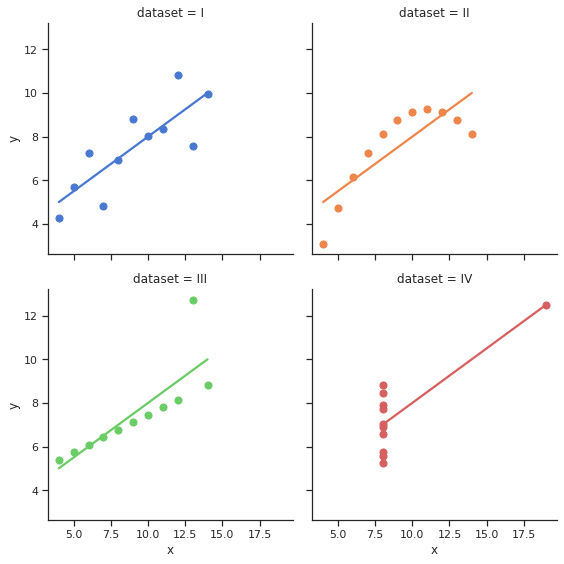

In [21]:
import seaborn as sns

sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

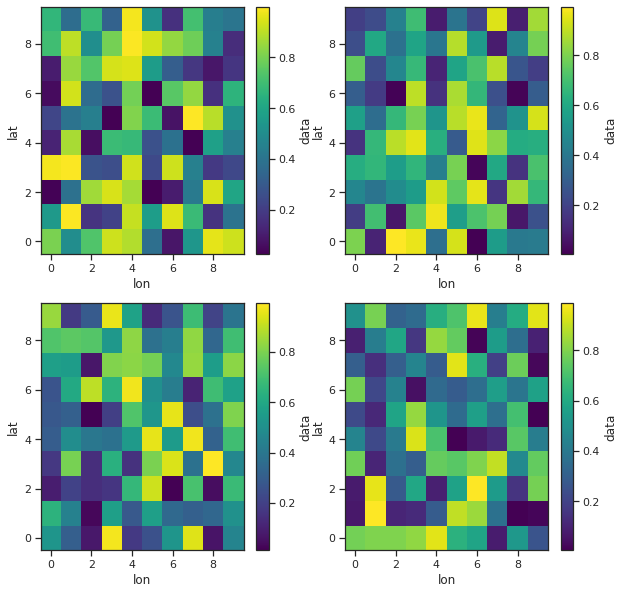

In [22]:
import xarray as xr

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

ds = xr.Dataset({
    'data': xr.DataArray(
        data = np.random.rand(10, 10, 4),
        dims = ['lat', 'lon', 'time'])
        }
    )

ds.isel(time=0).data.plot(ax=axes[0,0])
ds.isel(time=1).data.plot(ax=axes[0,1])
ds.isel(time=2).data.plot(ax=axes[1,0])
ds.isel(time=3).data.plot(ax=axes[1,1])

### Exercise 1

Consider you have the following data in a text file (The file `data/stations.txt` contains the full dataset):

    # Station  Lat    Long   Elev 
    BIRA    26.4840 87.2670 0.0120
    BUNG    27.8771 85.8909 1.1910
    GAIG    26.8380 86.6318 0.1660
    HILE    27.0482 87.3242 2.0880
    ... etc.
    
    
These are the names of seismographic stations in the Himalaya, with their coordinates and elevations in Kilometers.

1. Make a scatter plot of all of these, using both the size and the color to (redundantly) encode elevation.  Label each station by its 4-letter code, and add a colorbar on the right that shows the color-elevation map.
    
2. If you have the basemap toolkit installed, repeat the same exercise but draw a grid with parallels and meridians, add rivers in cyan and country boundaries in yellow.  Also, draw the background using the NASA BlueMarble image of Earth.  You can install it with `conda install basemap`.

    
**Tips**
    
* You can check whether you have Basemap installed with:
    
    from mpl_toolkits.basemap import Basemap
    
* For the basemap part, choose a text label color that provides adequate reading contrast over the image background.
    
* Create your Basemap with 'i' resolution, otherwise it will take forever to draw.

## Part 2: Understanding the structure of digital images



In [23]:
from matplotlib import cm

plt.rcParams['figure.figsize'] = (8, 8)

Define a function to load images:

In [24]:
def image_load(fname, max_size=1200):
    """
    Load an image, downsampling if needed to keep within requested size.
    """
    
    img = plt.imread(fname)
    shape = np.array(img.shape, dtype=float)
    sample_fac = int(np.ceil((shape/max_size).max()))
    if sample_fac > 1:
        new_img = img[::sample_fac, ::sample_fac, ...]
        print('Downsampling %sX:'% sample_fac, img.shape, '->', new_img.shape)
        return new_img
    else:
        return img

We use the `%matplotlib widget` magic command to see a live, zoomable version of the plots.

In [25]:
%matplotlib widget

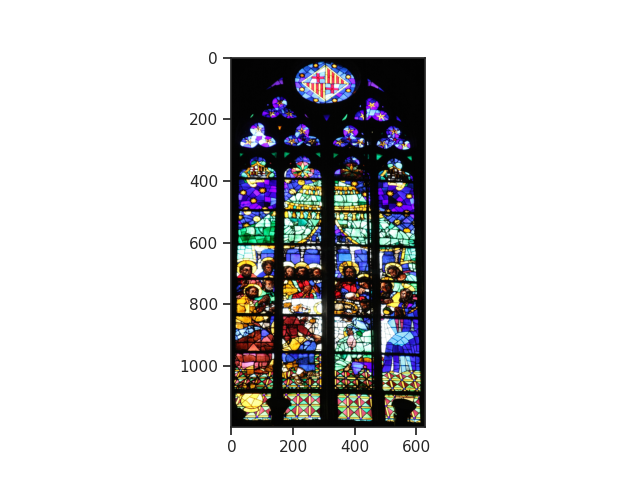

In [26]:
fname = 'data/stained_glass_barcelona.png'

img = image_load(fname)
plt.imshow(img);

We can directly display the original file in the notebook

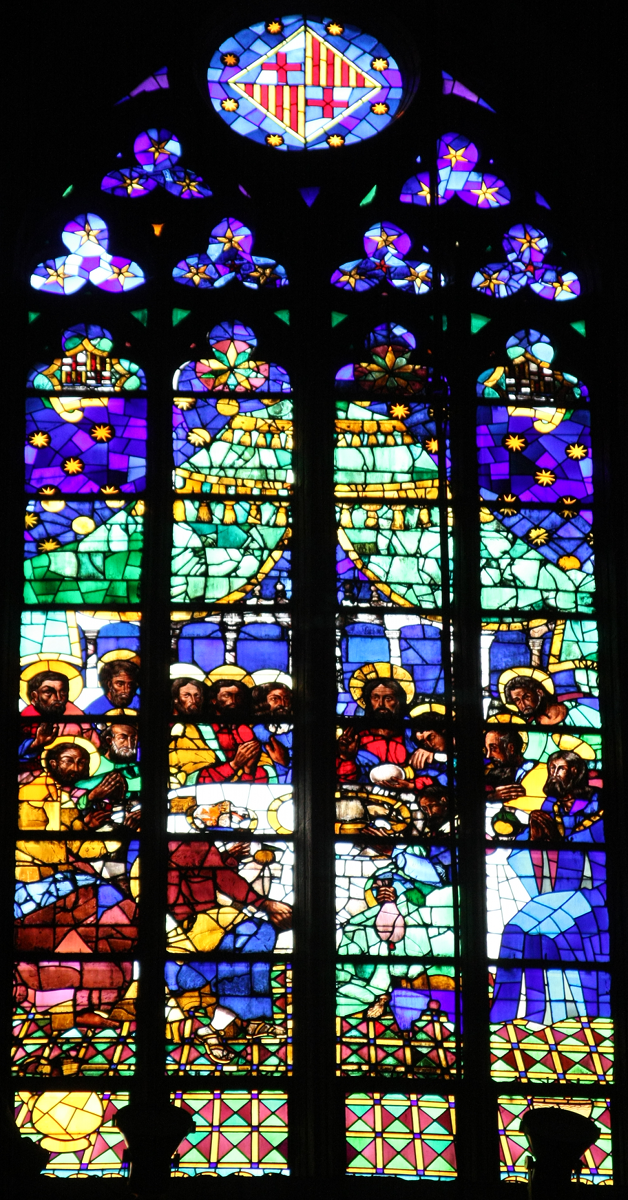

In [27]:
from IPython.core.display import Image
Image(filename=fname)

Now, the image is composed of four different channels. The first three entries in `img` have the intensity in the red, green and blue channels, and the last one represents the luminosity. 

In [28]:
img.shape

(1200, 628, 4)

### Exercise 2

Extract each color (RGB) channel and create a figure with 4 subplots, one for each
channel, so we can see its structure clearly. Display the full color figure and the color channels. Use `imshow()` for each one of the channels. Specify the colormap used for each image to match the color of the channel (for example, you can use `cmap=cm.Reds_r` for the first channel). Ensure that the axes are linked so zooming in one image zooms the same region in the others (you can explore the `sharex` and `sharey` [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html)). The final plot should look something like this, were you have the option to zoom in the image. 

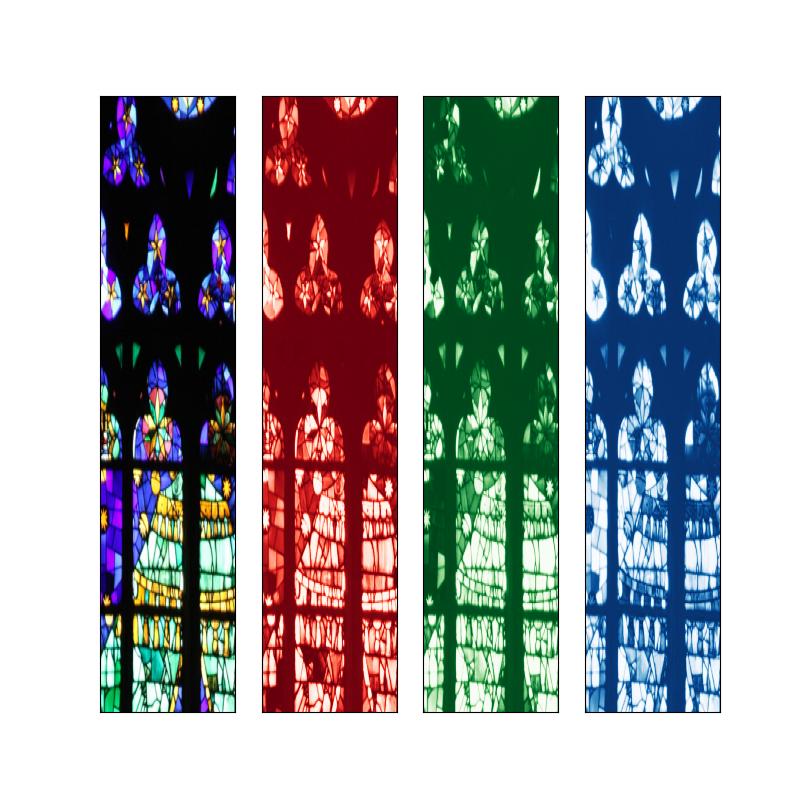

In [16]:
Image(filename='data/barcelona_fig1.png')

In [27]:
red, green, blue = [ img[:,:,i] for i in range(3) ]

### Exerice 3

Compute a luminosity and per-channel histogram and display all four histograms in one figure, giving each a separate plot (hint: a 4x1 plot works best for this).  Link the appropriate axes together.
    
PNG images sometimes have a 4th transparency channel, sometimes not.  To
be safe, we generate a luminosity array consisting of only the first 3
channels.

In [18]:
lumi = img[:,:,:3].mean(axis=2)

Now, display a histogram for each channel.  Note that jpeg images come
back as integer images with a luminosity range of 0..255 while pngs are
read as floating point images in the 0..1 range.  So we adjust the
histogram range accordingly:

In [20]:
hrange = (0.0, 1.0) if lumi.max()<=1.0 else (0.0, 255.0)

The luminosity and per channel histogram should look something like this

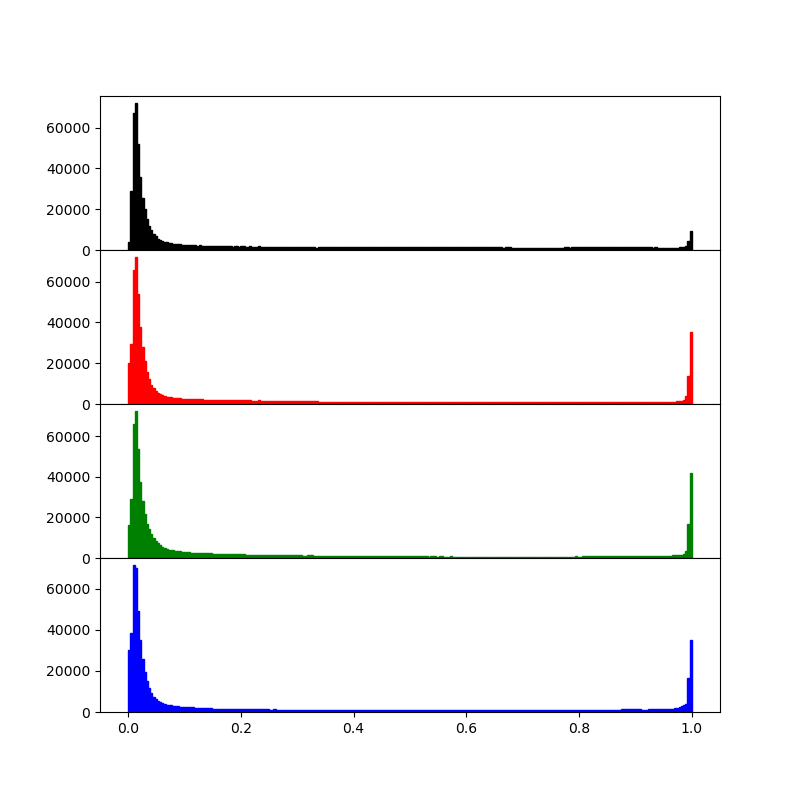

In [22]:
Image(filename='data/barcelona_fig2.png')

### Exercise 4

Create a black-and-white (or more precisely, grayscale) version of the image.  Compare the results from a naive average of all three channels with that of a model that uses 30% red, 59% green and 11% blue, by displaying all three (full color and both grayscales) side by side with linked axes for zooming.

In [28]:
lumi2 = .3*red + .59*green + 0.11*blue

The final plot should look like this

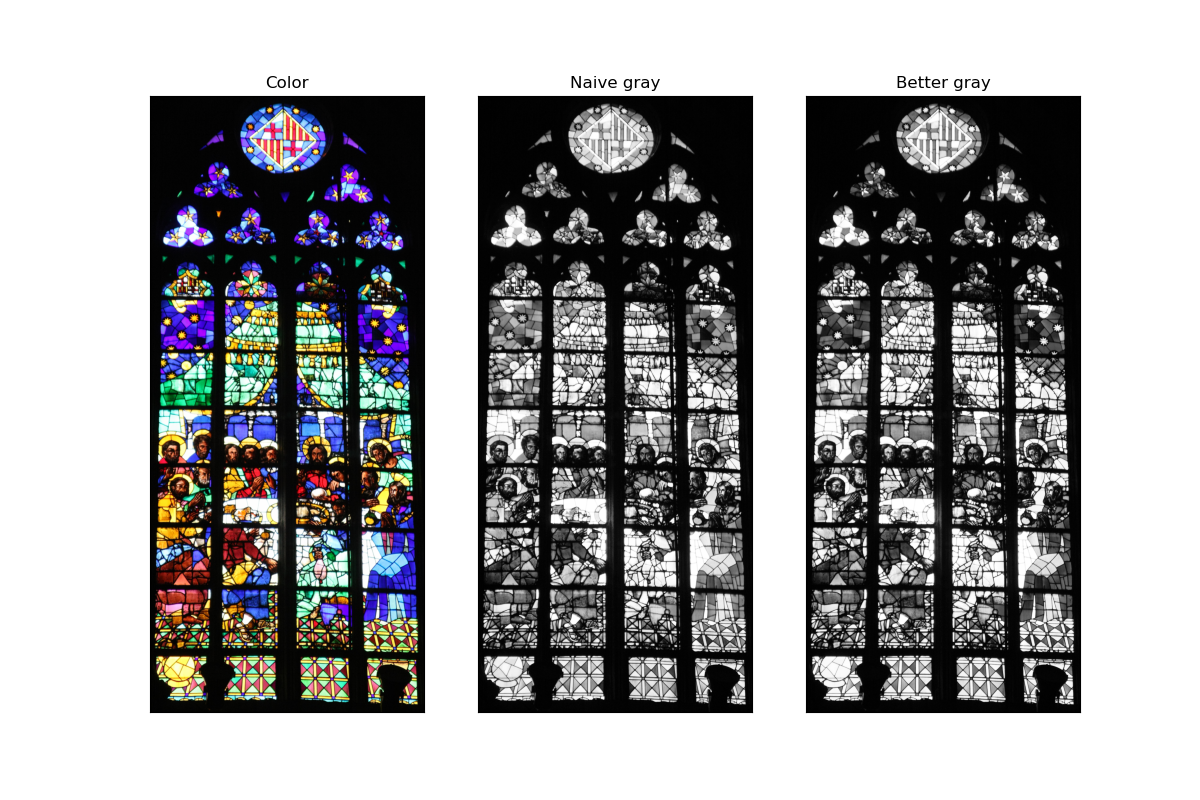

In [30]:
Image('data/barcelona_fig3.png')

## Part 3: Simple 3d plotting with matplotlib

Note that you must execute at least once in your session:

In [6]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the ``projection='3d'`` keyword to ``add_subplot``::
```python
    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')
```

A simple interactive surface plot:

(-1.01, 1.01)

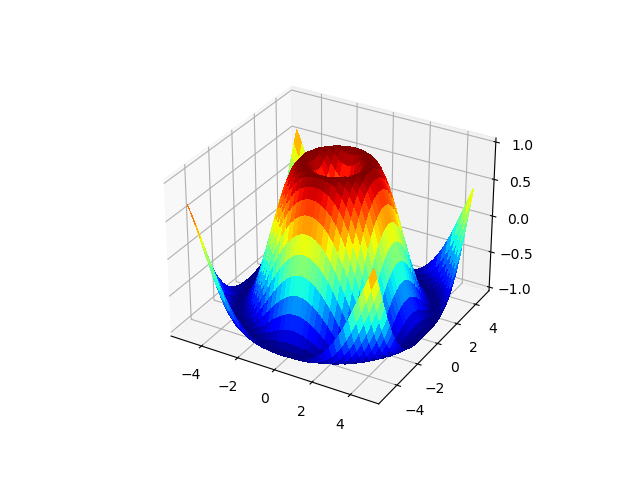

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = arange(-5, 5, 0.25)
Y = arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = sqrt(X**2 + Y**2)
Z = sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

And a parametric surface specified in cylindrical coordinates:

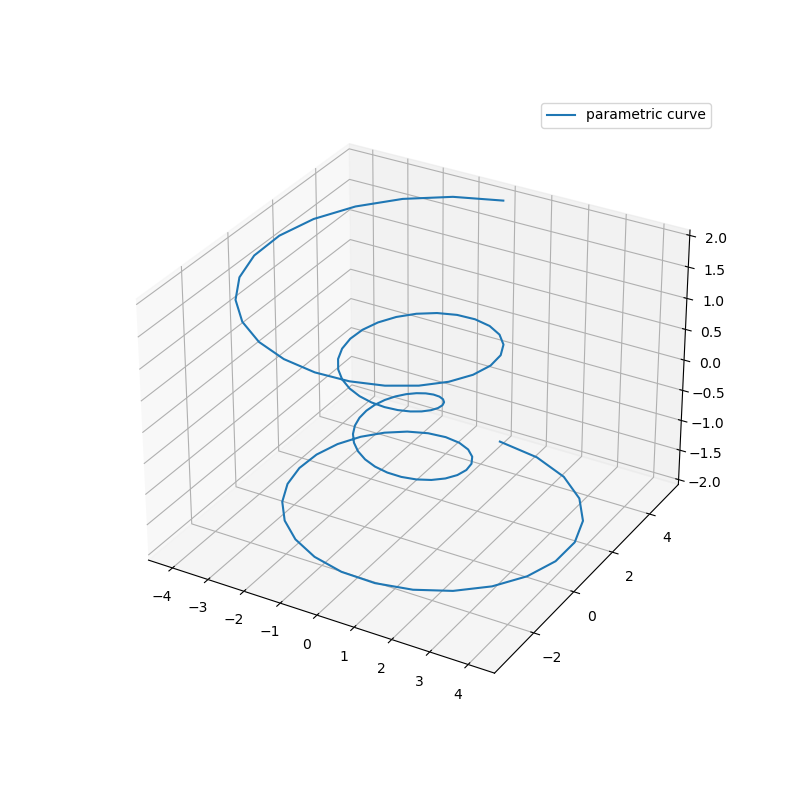

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = linspace(-4*pi, 4*pi, 100)
z = linspace(-2, 2, 100)
r = z**2 + 1
x = r*sin(theta)
y = r*cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

## Additional comments

Matplotlib is a very rich library that allow to creation of scientific figures but is also very flexible, to the point that it can be use to generate very beutiful images. There is a very nice collection of plots you can generate using matplotlib in [Nicolas Rougier GH repository](https://github.com/rougier) you can take a look at.